In [1]:
!pip install pyplr
!pip install neurokit2
!pip install fastnumbers
!pip install datamatrix

import sys
sys.path.append("../Pupillengröße/Skripte/")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import logging as log
import checkdataPLR
import importlib
from IPython.display import display
def display_all(df):
    from IPython.display import HTML, display
    IPython.display(IPython.HTML(df.to_html()))


In [2]:
# reload checkdata
import pup_config
importlib.reload(pup_config)
importlib.reload(checkdataPLR)

plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['figure.dpi'] = 200 
subject_id="PJ24_2_PLR1"
#data_dir="../data/groesse/3.4Stimulation/"
data_dir=pup_config.data_dir
rec_dir=pup_config.data_dir
config=checkdataPLR.DataConfig(window_duration=80) #7200
(eye0,p_file,a_file)=checkdataPLR.prepare(data_dir,subject_id,0,config)
(eye1,p_file,a_file)=checkdataPLR.prepare(data_dir,subject_id,1,config)
# checkdata.plot(eye0[0],"auge 0 (0)")
display(a_file)


'/home/marco/Nextcloud/KatharinaBeispieldaten//PJ24/PJ24_2_PLR1/annotation_timestamps.npy'

In [3]:
eye0[0].shape

(19202, 7)

### Use datamatrix from pydatamatrix.eu to fill in blinking gaps

pandas.core.series.Series

pandas.core.series.Series

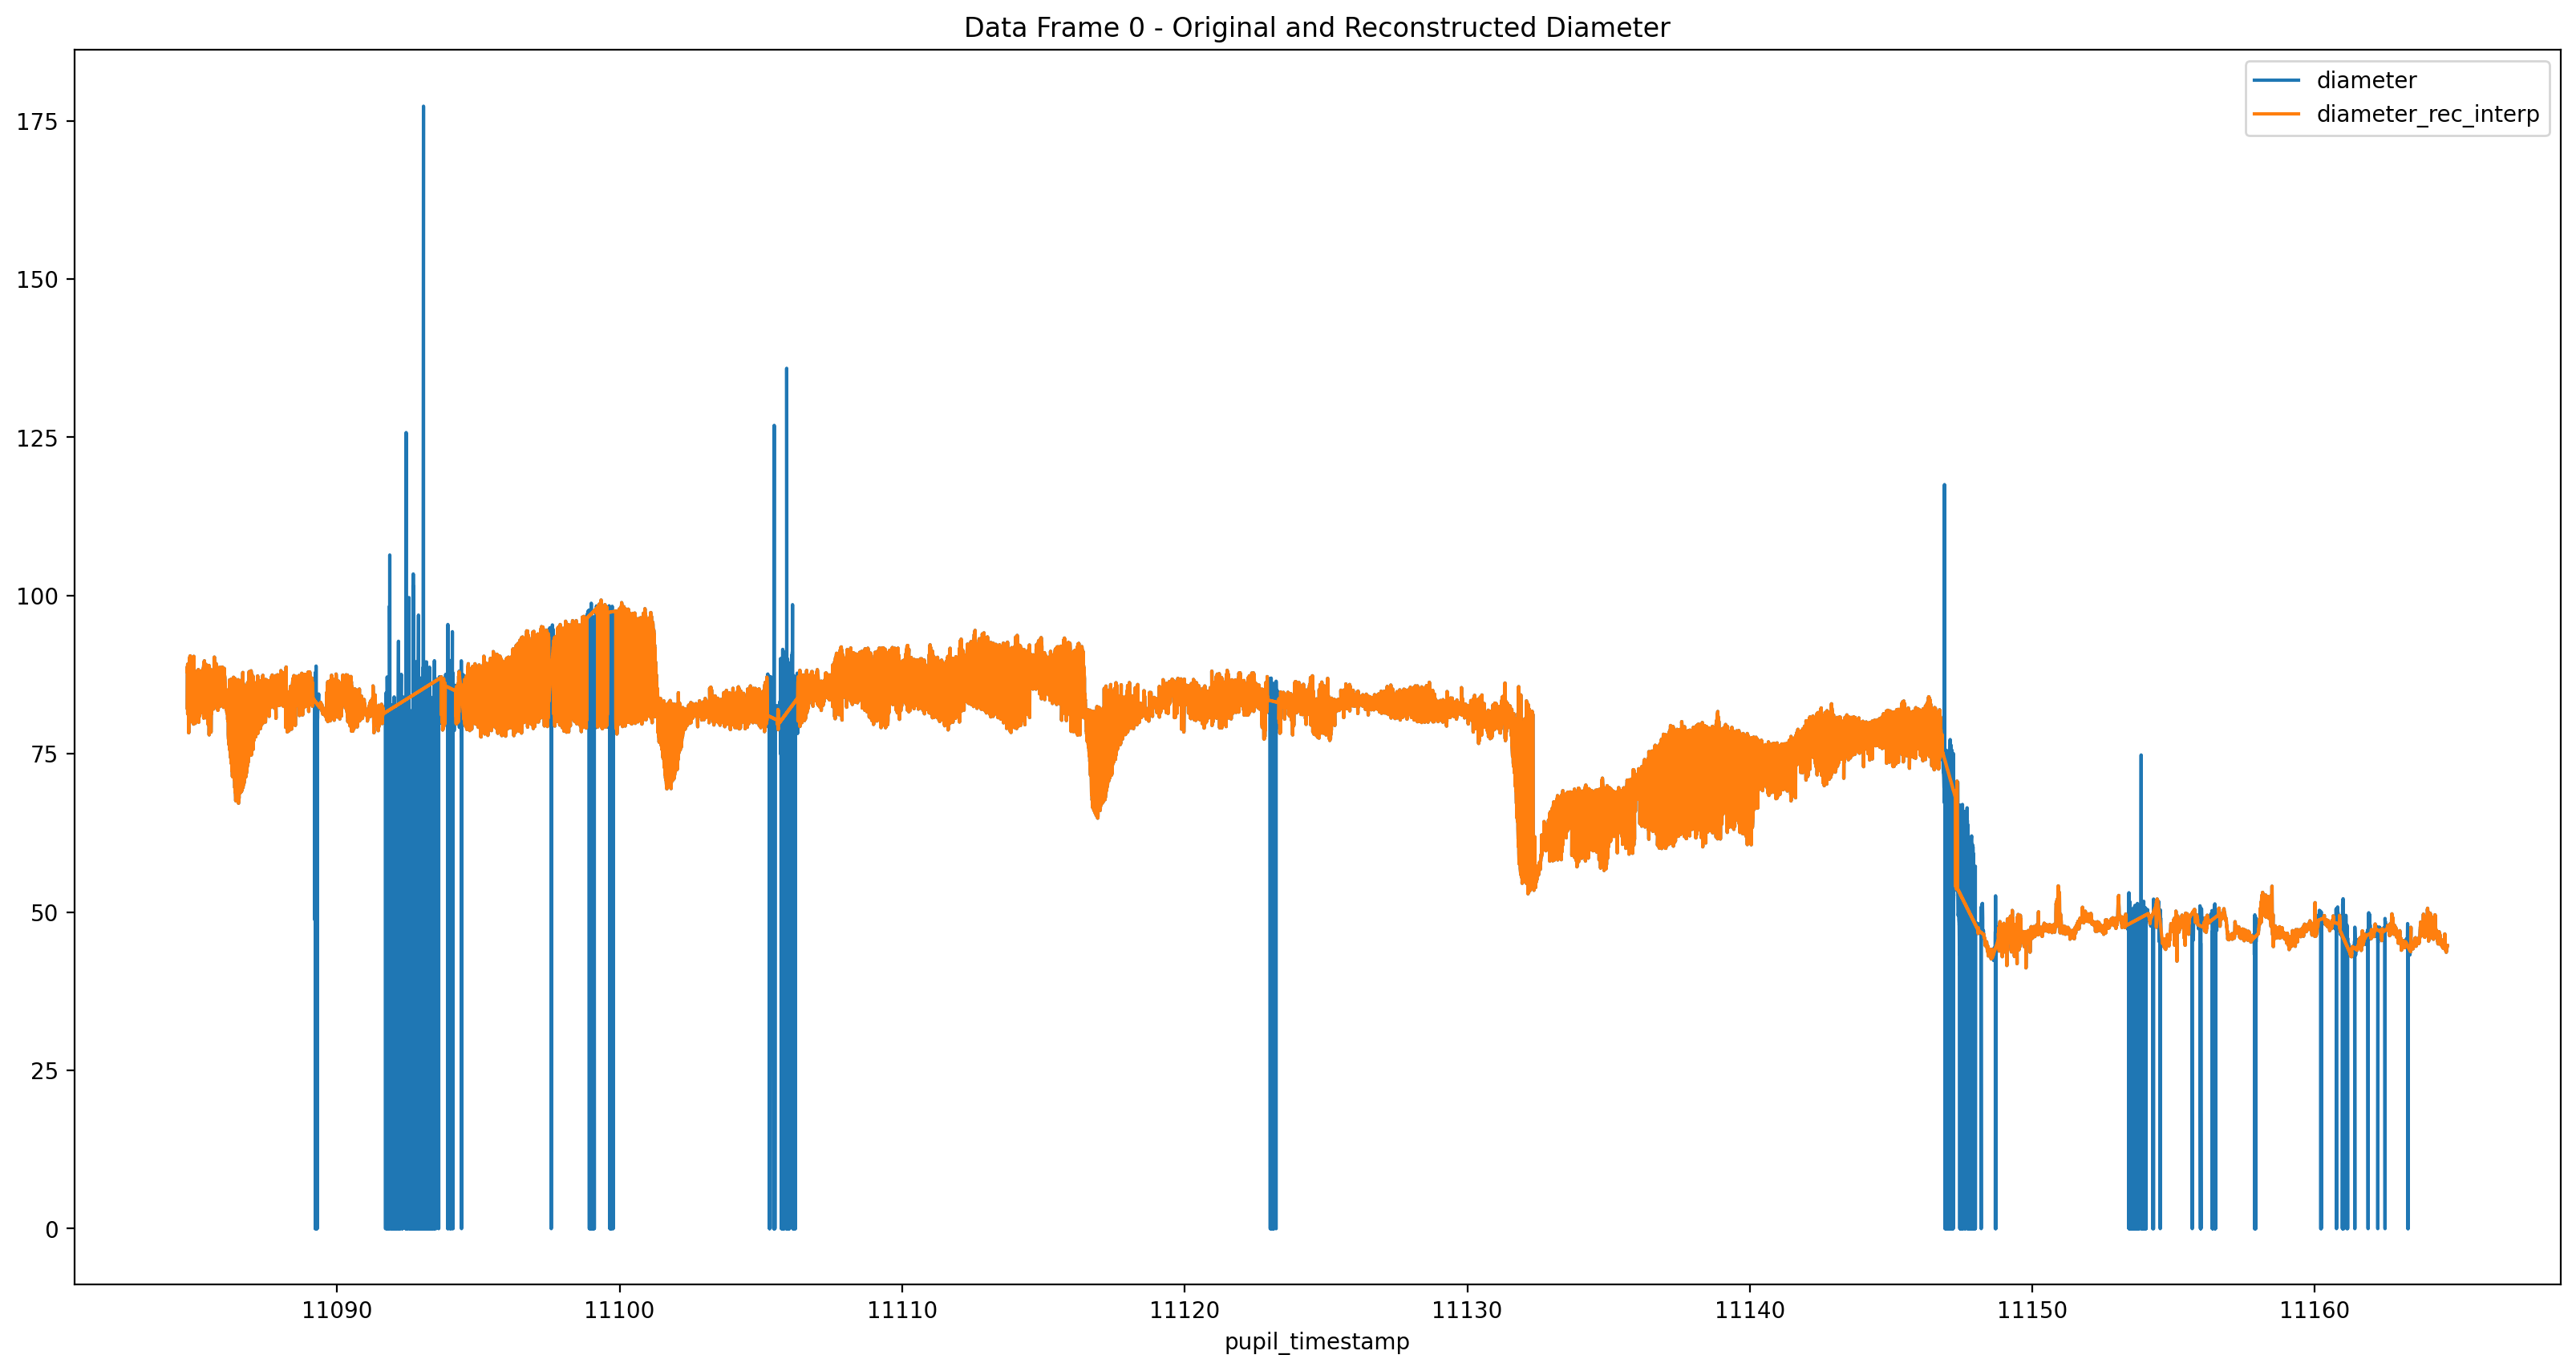

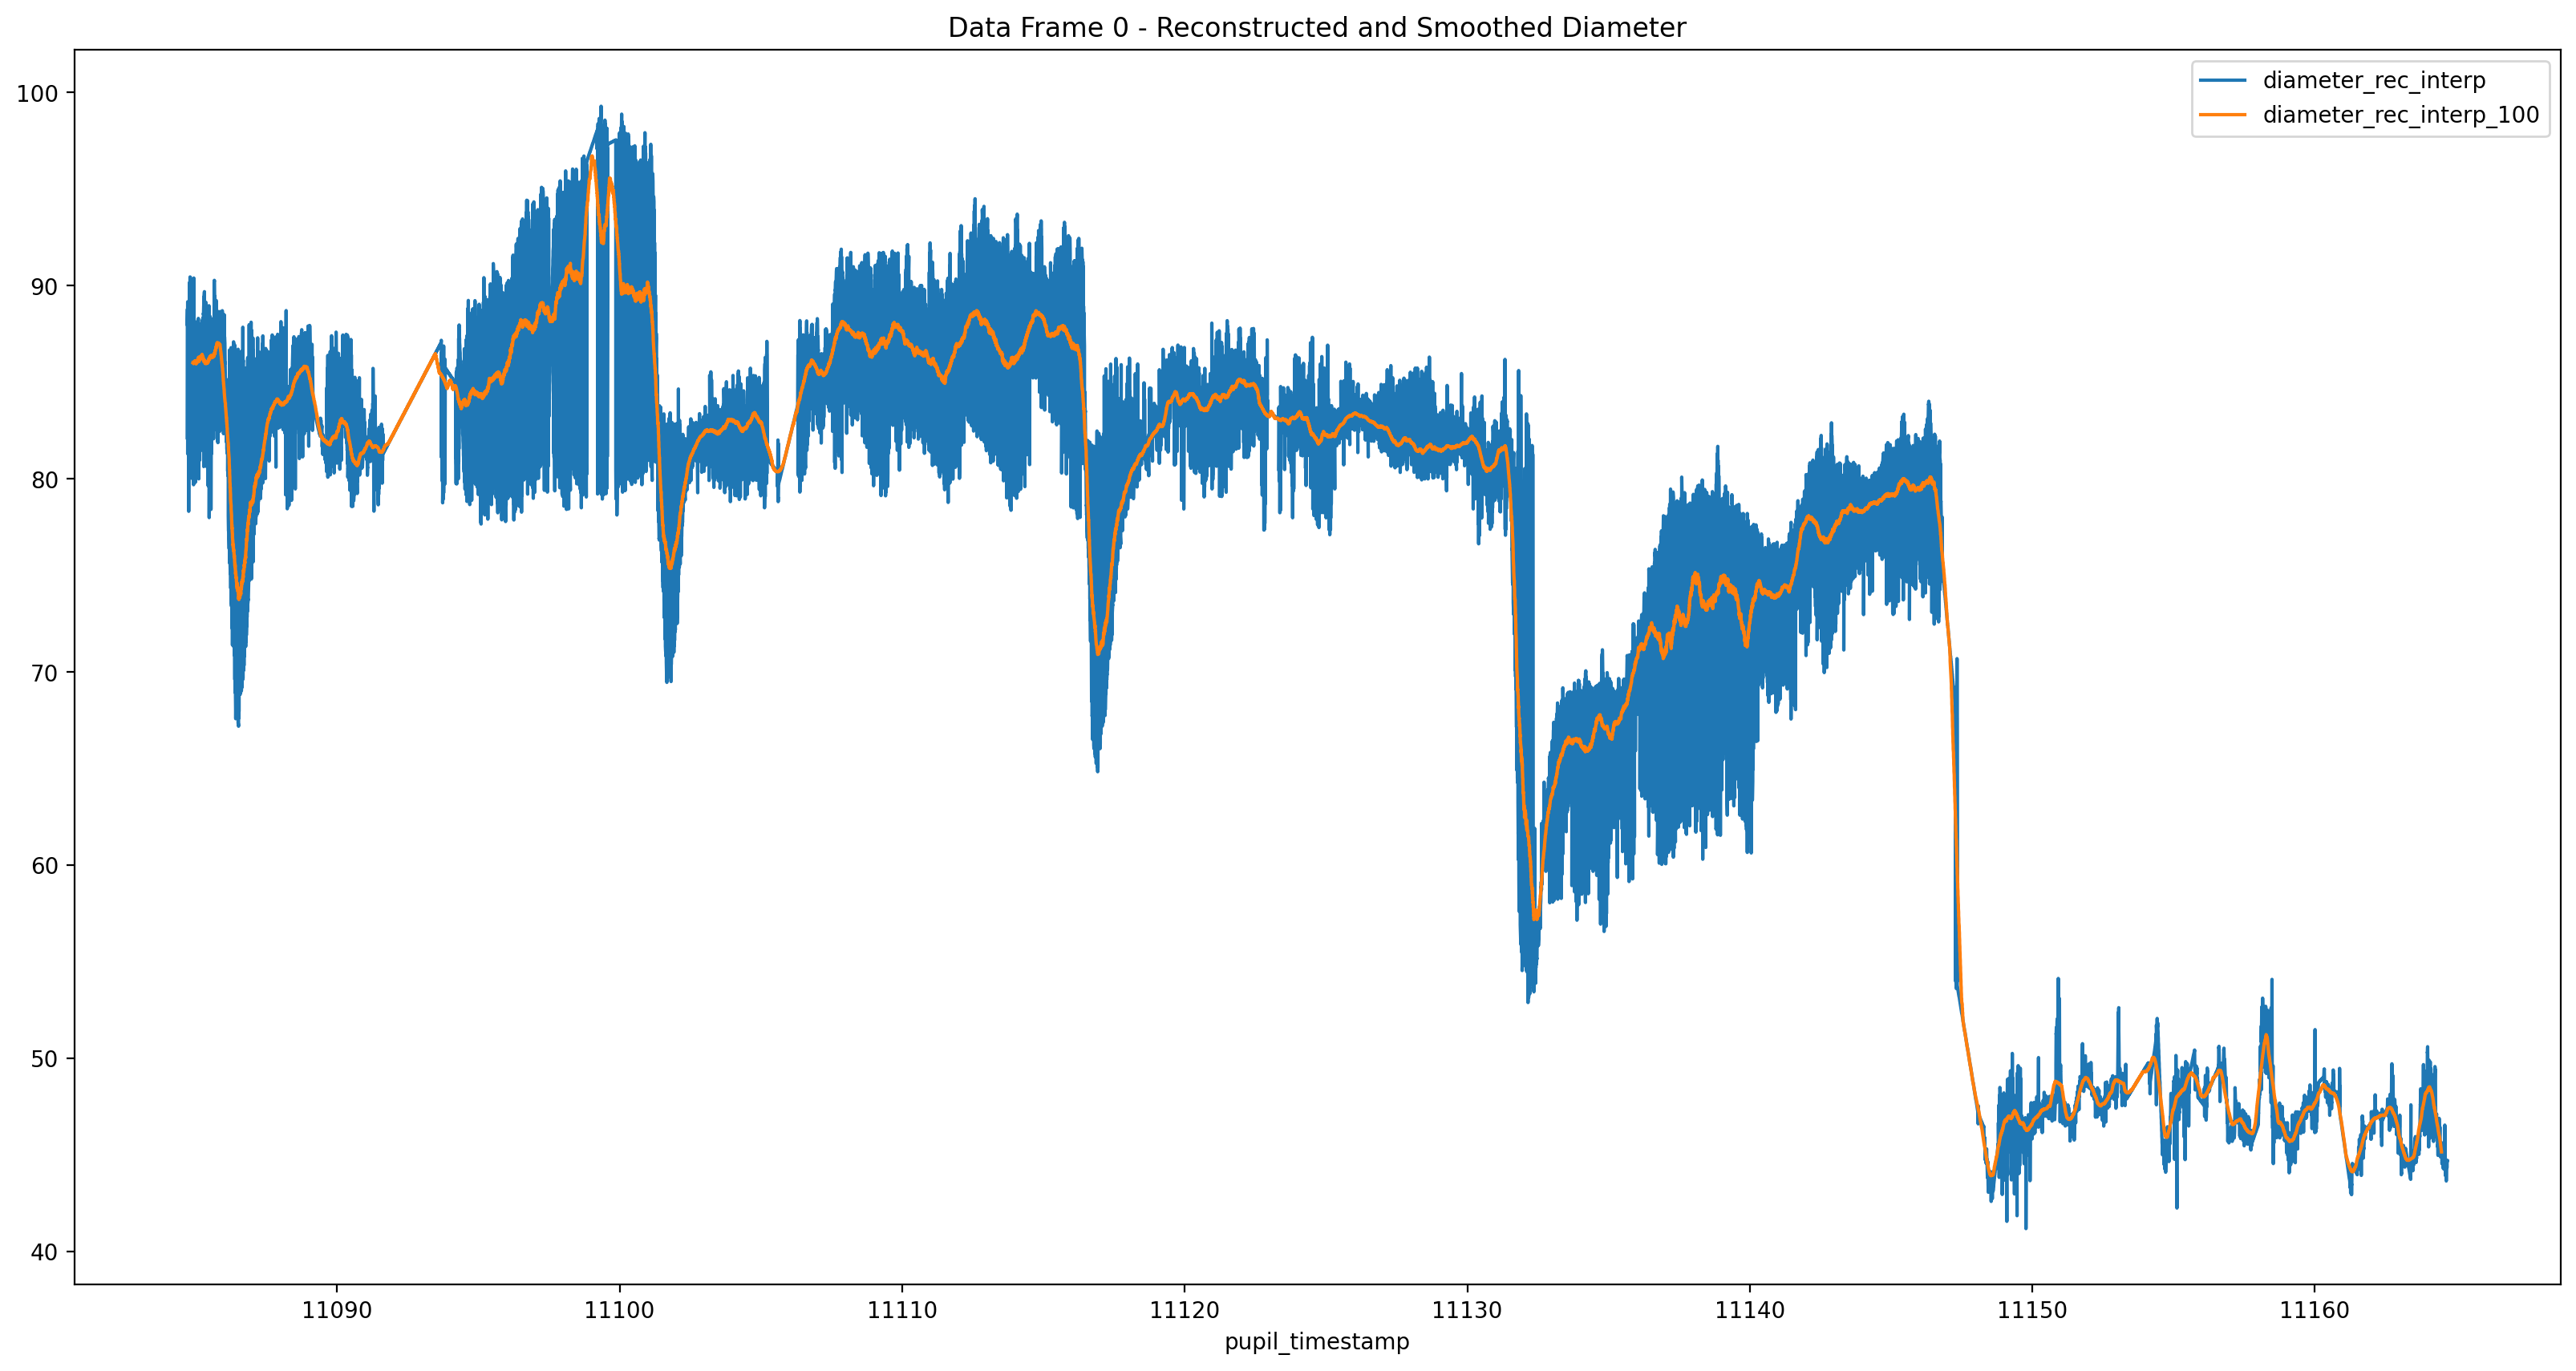

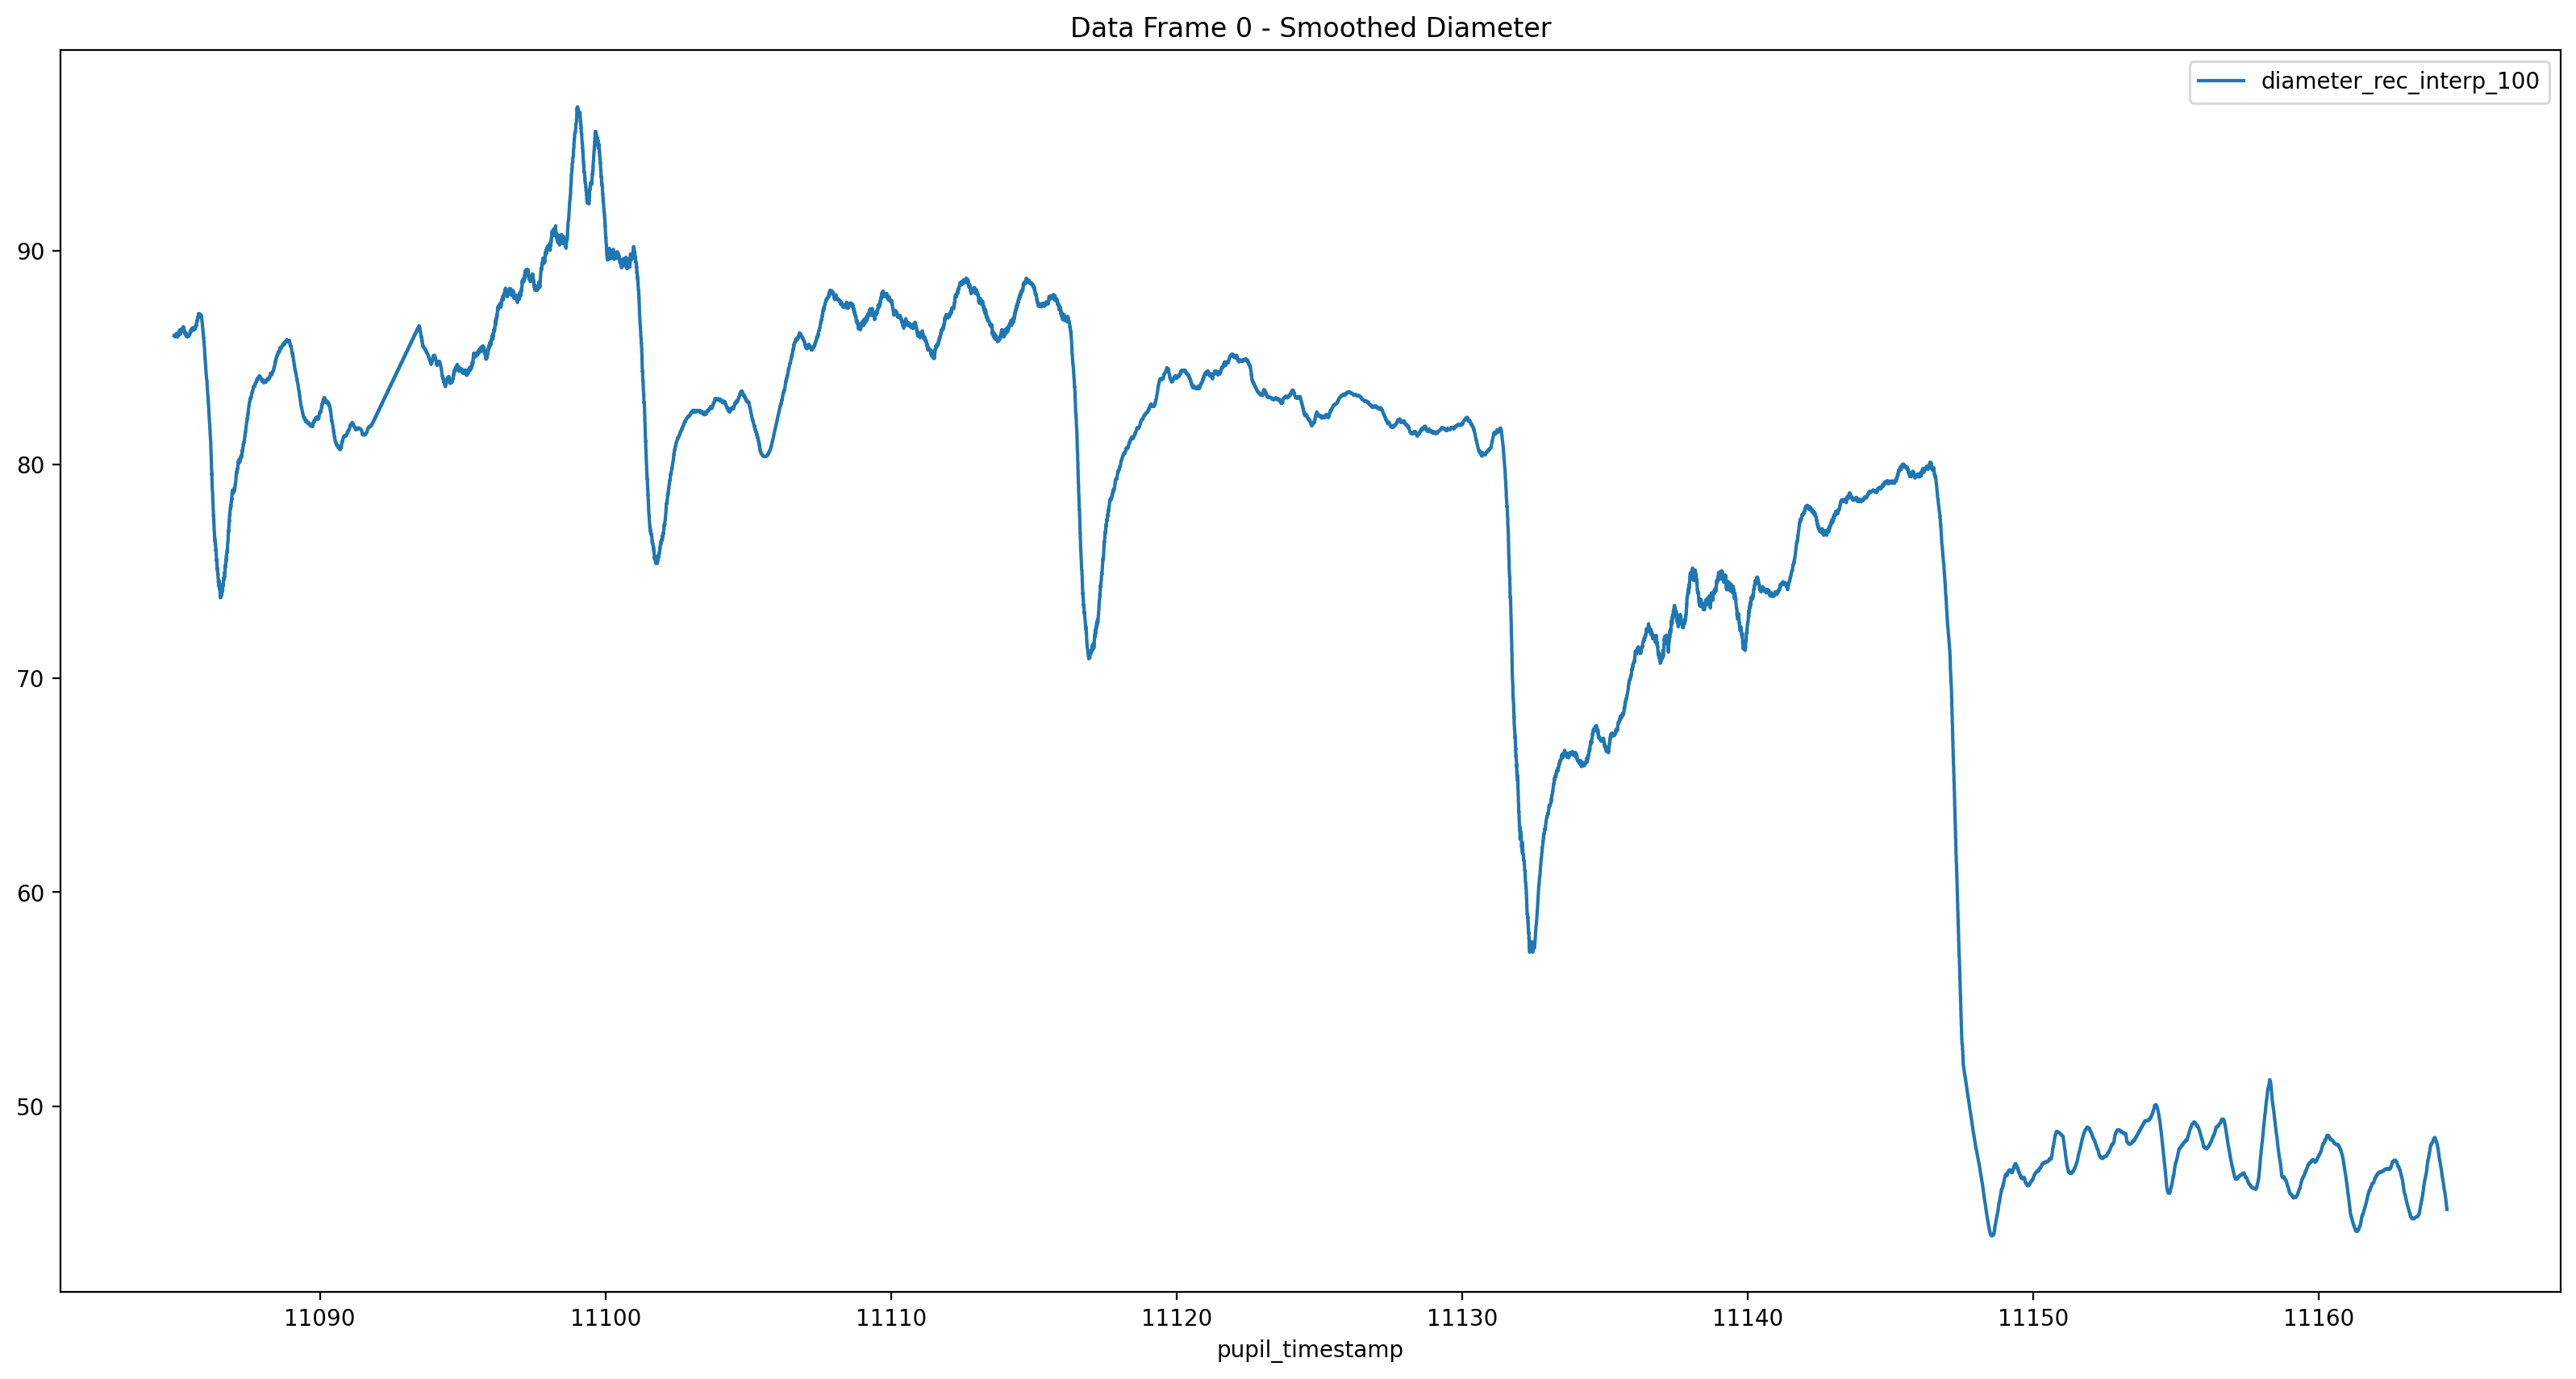

,pupil_timestamp,eye_id,confidence,diameter,diameter_3d,rowid,timeslot,diameter_rec,diameter_rec_interp,diameter_rec_interp_100
12130,11084.694856,0,0.755467,88.009705,NaN,0,0,88.009705,88.009705,NaN
12131,11084.694856,0,0.755467,88.056568,5.340584,1,0,88.056568,88.056568,NaN
12136,11084.702805,0,0.550408,88.793083,NaN,2,0,88.793083,88.793083,NaN
12137,11084.702805,0,0.086143,82.055675,4.914609,3,0,82.055675,82.055675,NaN
12140,11084.710838,0,0.652256,89.174370,NaN,4,0,89.174370,89.174370,NaN
...,...,...,...,...,...,...,...,...,...,...
50525,11164.675105,0,0.827152,44.349202,2.656477,19197,19,44.349202,44.349202,NaN
50526,11164.682846,0,0.980418,44.726498,NaN,19198,19,44.726498,44.726498,NaN
50527,11164.682846,0,0.980418,44.724381,2.678448,19199,19,44.724381,44.724381,NaN
50530,11164.691170,0,0.896972,44.680588,2.675474,19200,19,44.680588,44.680588,NaN


In [6]:
importlib.reload(checkdataPLR)
# Let's try to remove blinks and filter the result


#what=eye0[0]
plot_range = range(1)  # Indices of data frames to plot (0-19)

def reconstruct(eye, window_size=100):
        # Remove blinks.
        eye['diameter_rec']=checkdataPLR.blinkreconstruct(eye['diameter'], 
                                                       vt_start=50,vt_end=5, mode='advanced')
        # blinkreconstruct replaces the bliks with NaN with mode='advanced',
        # so we interpolate the gaps and low pass the result to obtain something. 
        eye['diameter_rec_interp']=eye['diameter_rec'].interpolate(method='linear')
        # Use moving average + recenter as low pass.
        eye['diameter_rec_interp_100']=eye['diameter_rec_interp'].rolling(window=window_size).mean().shift(-window_size//2)


# Iterate over the specified data frames
for i in plot_range:
    what = eye0[i]
    reconstruct(what)

    def reconstruct(eye, window_size=100):
        # Remove blinks.
        eye['diameter_rec']=checkdataPLR.blinkreconstruct(eye['diameter'], 
                                                       vt_start=50,vt_end=5, maxdur=5000, mode='advanced')
        # blinkreconstruct replaces the bliks with NaN with mode='advanced',
        # so we interpolate the gaps and low pass the result to obtain something. 
        eye['diameter_rec_interp']=eye['diameter_rec'].interpolate(method='linear')
        # Use moving average + recenter as low pass.
        eye['diameter_rec_interp_100']=eye['diameter_rec_interp'].rolling(window=window_size).mean().shift(-window_size//2)

        
plot_range = range(1)  # Indices of data frames to plot (0-19)

    # Iterate over the specified data frames
for i in plot_range:
    what = eye0[i]
    reconstruct(what)
    
    sub = what.plot(x='pupil_timestamp', y='diameter', kind='line')

    sub = what.plot(ax=sub, x='pupil_timestamp', y='diameter_rec_interp', kind='line')
    sub.set_title(f"Data Frame {i} - Original and Reconstructed Diameter")

    sub = what.plot(x='pupil_timestamp', y='diameter_rec_interp', kind='line')

    sub = what.plot(ax=sub, x='pupil_timestamp', y='diameter_rec_interp_100', kind='line')
    sub.set_title(f"Data Frame {i} - Reconstructed and Smoothed Diameter")

    what.plot(x='pupil_timestamp', y='diameter_rec_interp_100', kind='line')
    plt.title(f"Data Frame {i} - Smoothed Diameter")

    plt.show()

display(what)   
# Iterate over the specified data frames
#for i in plot_range:
 #   what = eye0[i]
  #  reconstruct(eye)
    
   # sub=eye.plot(x='pupil_timestamp', y='diameter', kind='line')
    #sub.set_title(f"Data Frame {i} - Original Diameter")
    #sub=eye.plot(ax=sub,x='pupil_timestamp', y='diameter_rec', kind='line')
    #eye.plot(ax=sub,x='pupil_timestamp', y='diameter_rec_interp', kind='line')

    #sub=eye.plot(x='pupil_timestamp', y='diameter_rec_interp', kind='line')
    #eye.plot(ax=sub,x='pupil_timestamp', y='diameter_rec_interp_100', kind='line')
    # Make an extra plot to see how the smoothed data looks like
    #eye.plot(x='pupil_timestamp', y='diameter_rec_interp_100', kind='line')



    
# How does it look like?
#eye=eye0[1]
#reconstruct(eye)

#sub=eye.plot(x='pupil_timestamp', y='diameter', kind='line')
#sub=eye.plot(ax=sub,x='pupil_timestamp', y='diameter_rec', kind='line')
#eye.plot(ax=sub,x='pupil_timestamp', y='diameter_rec_interp', kind='line')

#sub=eye.plot(x='pupil_timestamp', y='diameter_rec_interp', kind='line')
#eye.plot(ax=sub,x='pupil_timestamp', y='diameter_rec_interp_100', kind='line')
# Make an extra plot to see how the smoothed data looks like
#eye.plot(x='pupil_timestamp', y='diameter_rec_interp_100', kind='line')


In [7]:
import csv
import os
importlib.reload(pup_config)
df = pd.DataFrame(what)
df["method"]="2d"
import os
os.makedirs(f"{pup_config.obj_dir}/Testi/exports/000/",exist_ok=True)
df.to_csv(f"{pup_config.obj_dir}/Testi/exports/000/pupil_positions.csv")
a_csv_file=f"{os.path.dirname(p_file)}/annotations.csv"
print(a_csv_file)
import shutil
shutil.copy2(a_csv_file,f"{pup_config.obj_dir}/Testi/exports/000/")

/Users/Katharina/Desktop/Beispieldaten/PJ24/PJ24_2_PLR1/exports/000/annotations.csv


'/Users/Katharina/Desktop/ErzeugteDateien/Testi/exports/000/annotations.csv'

pandas.core.series.Series

pandas.core.series.Series

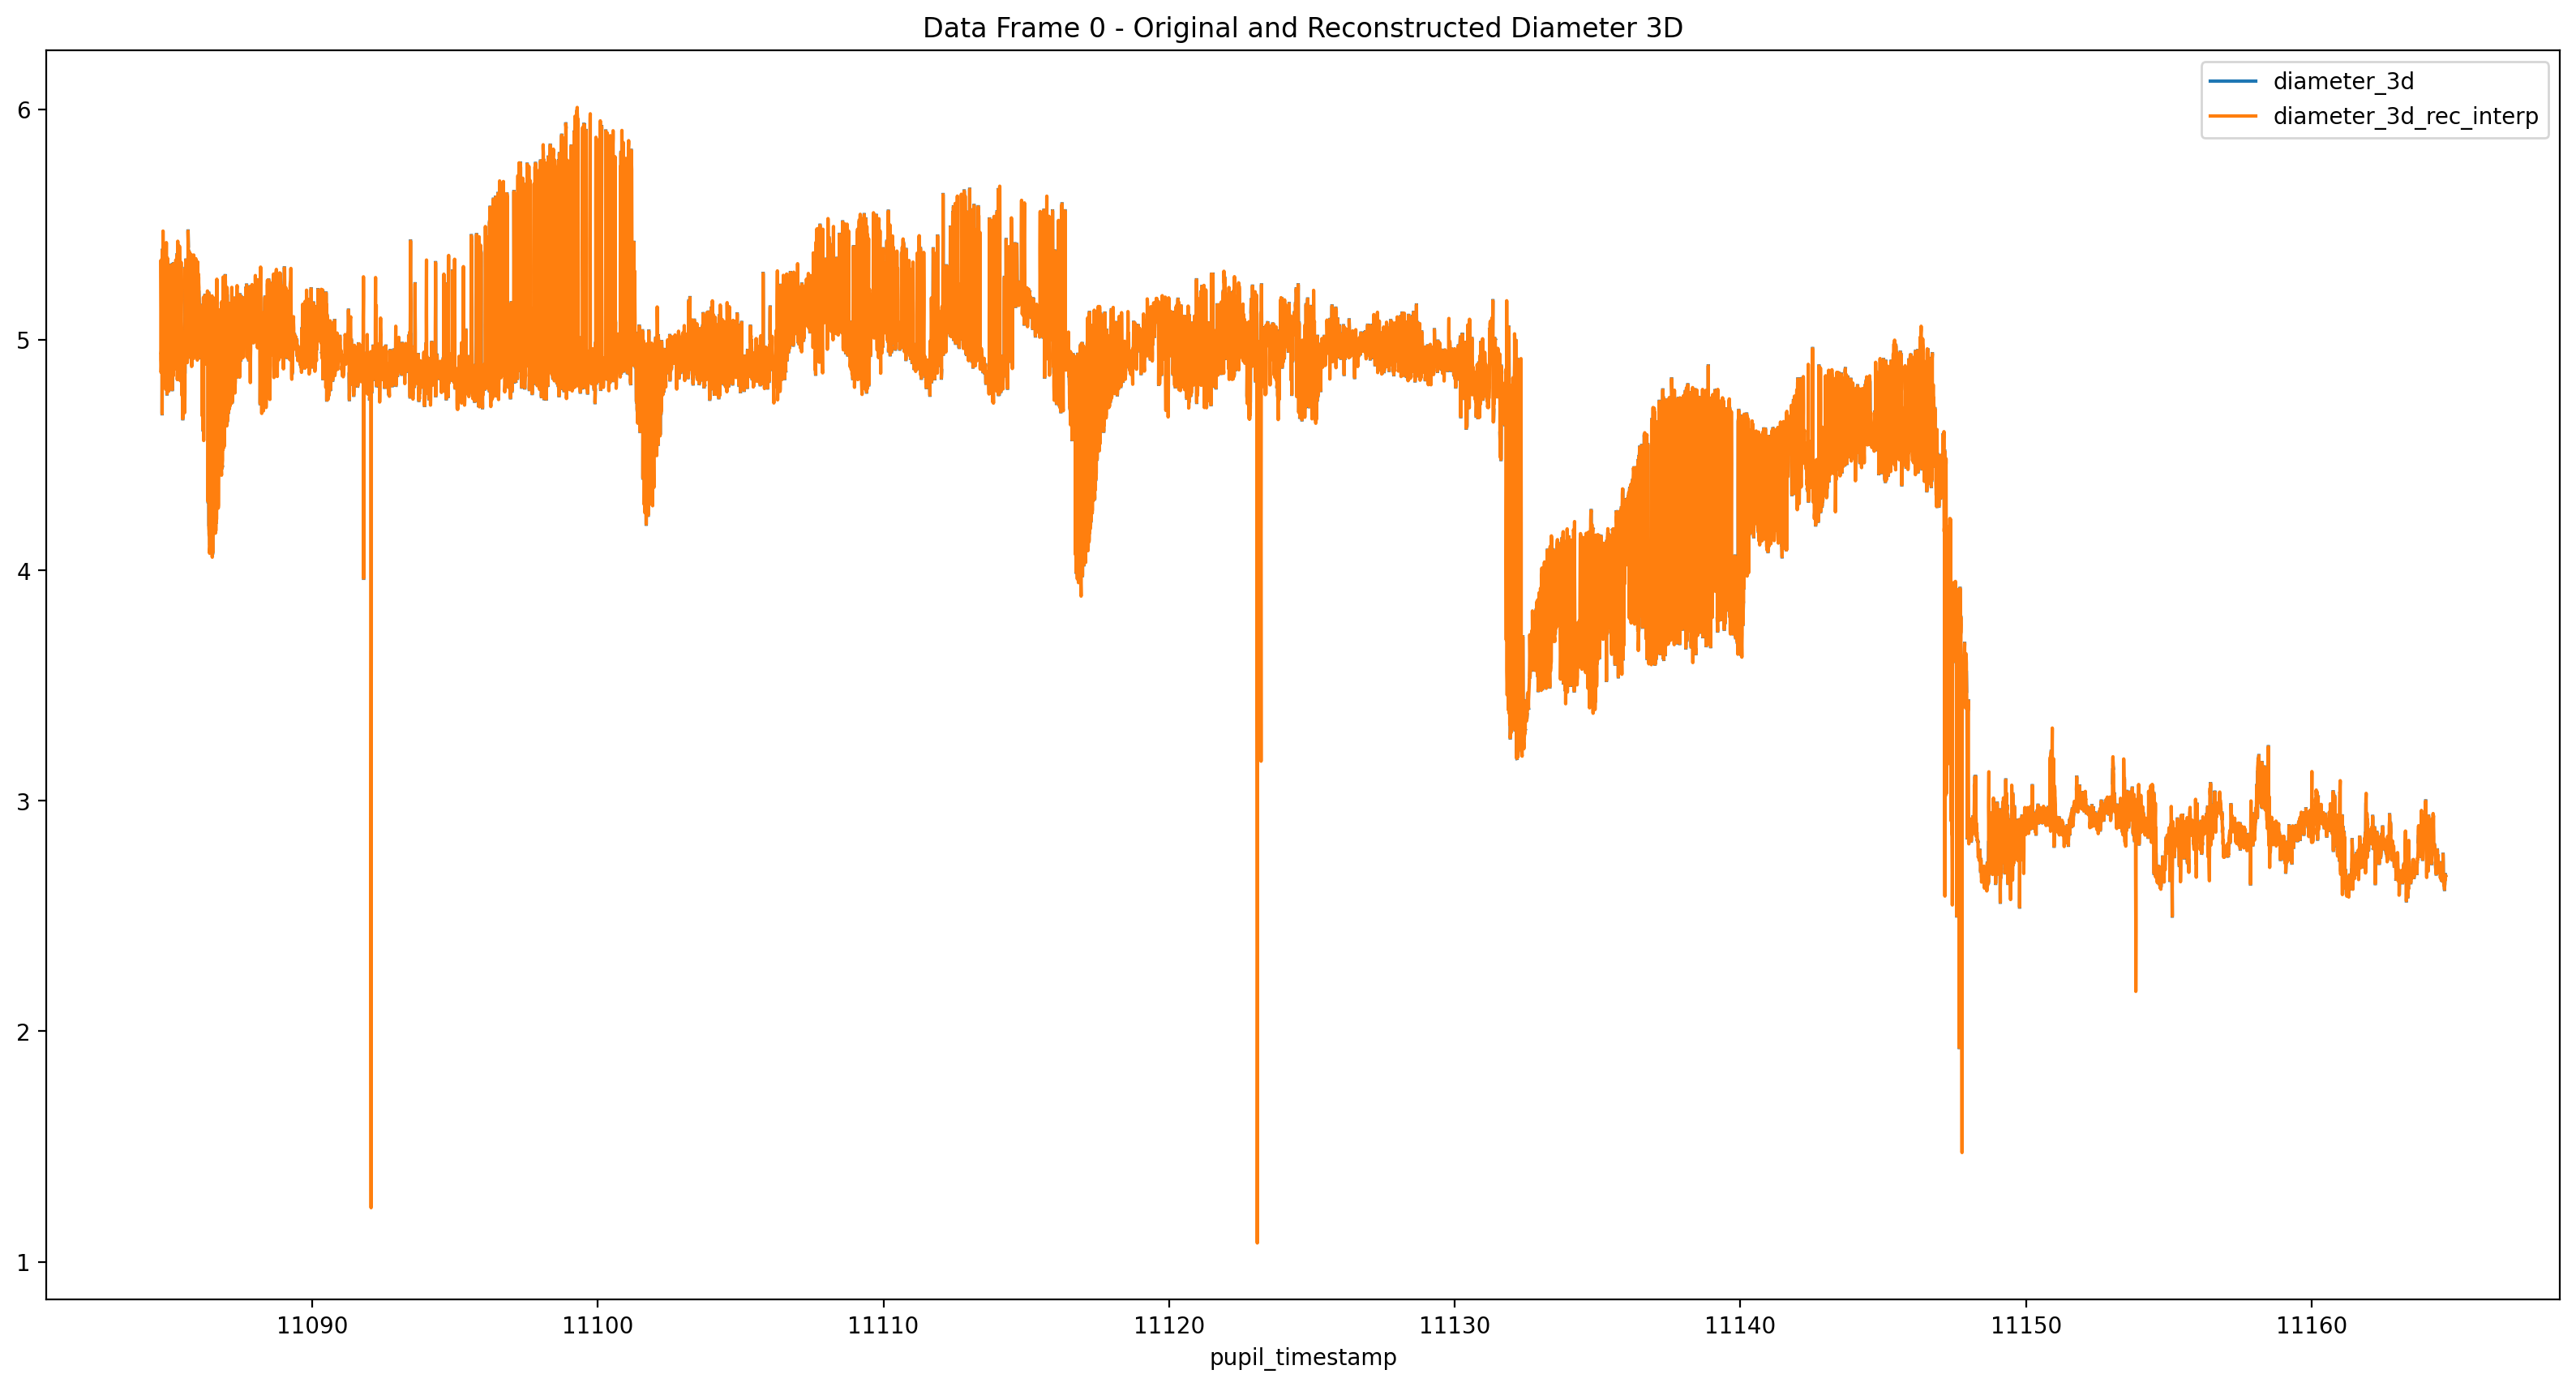

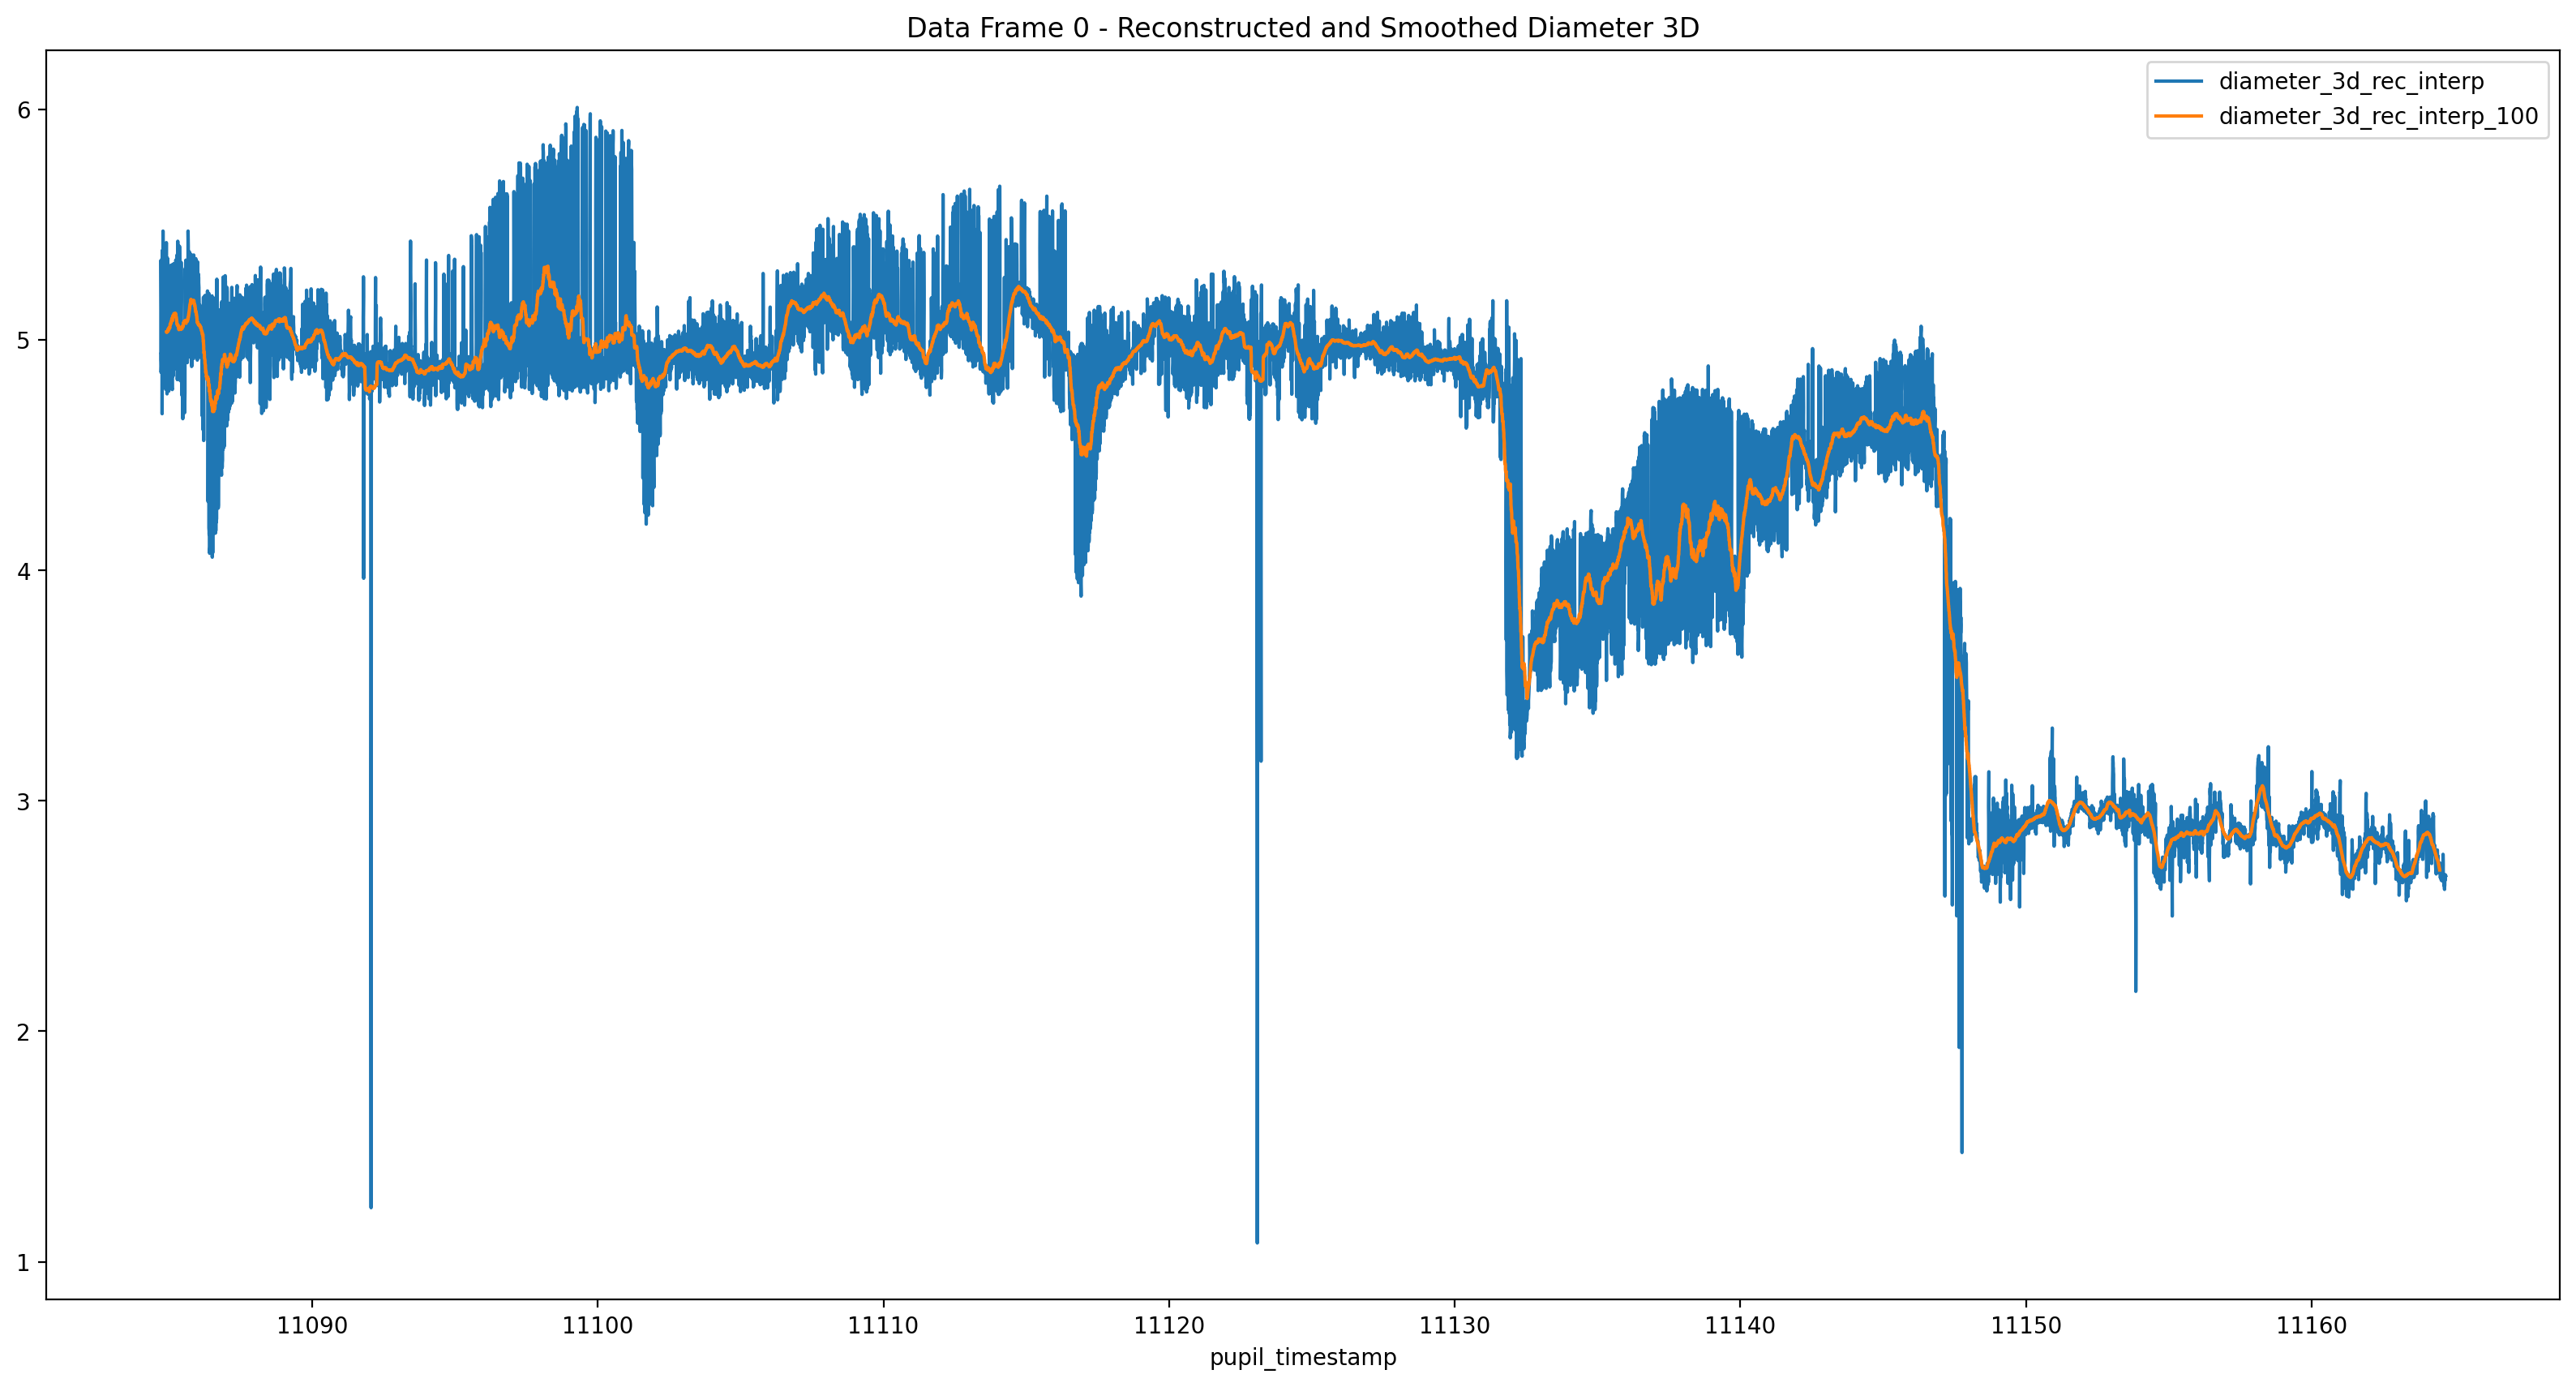

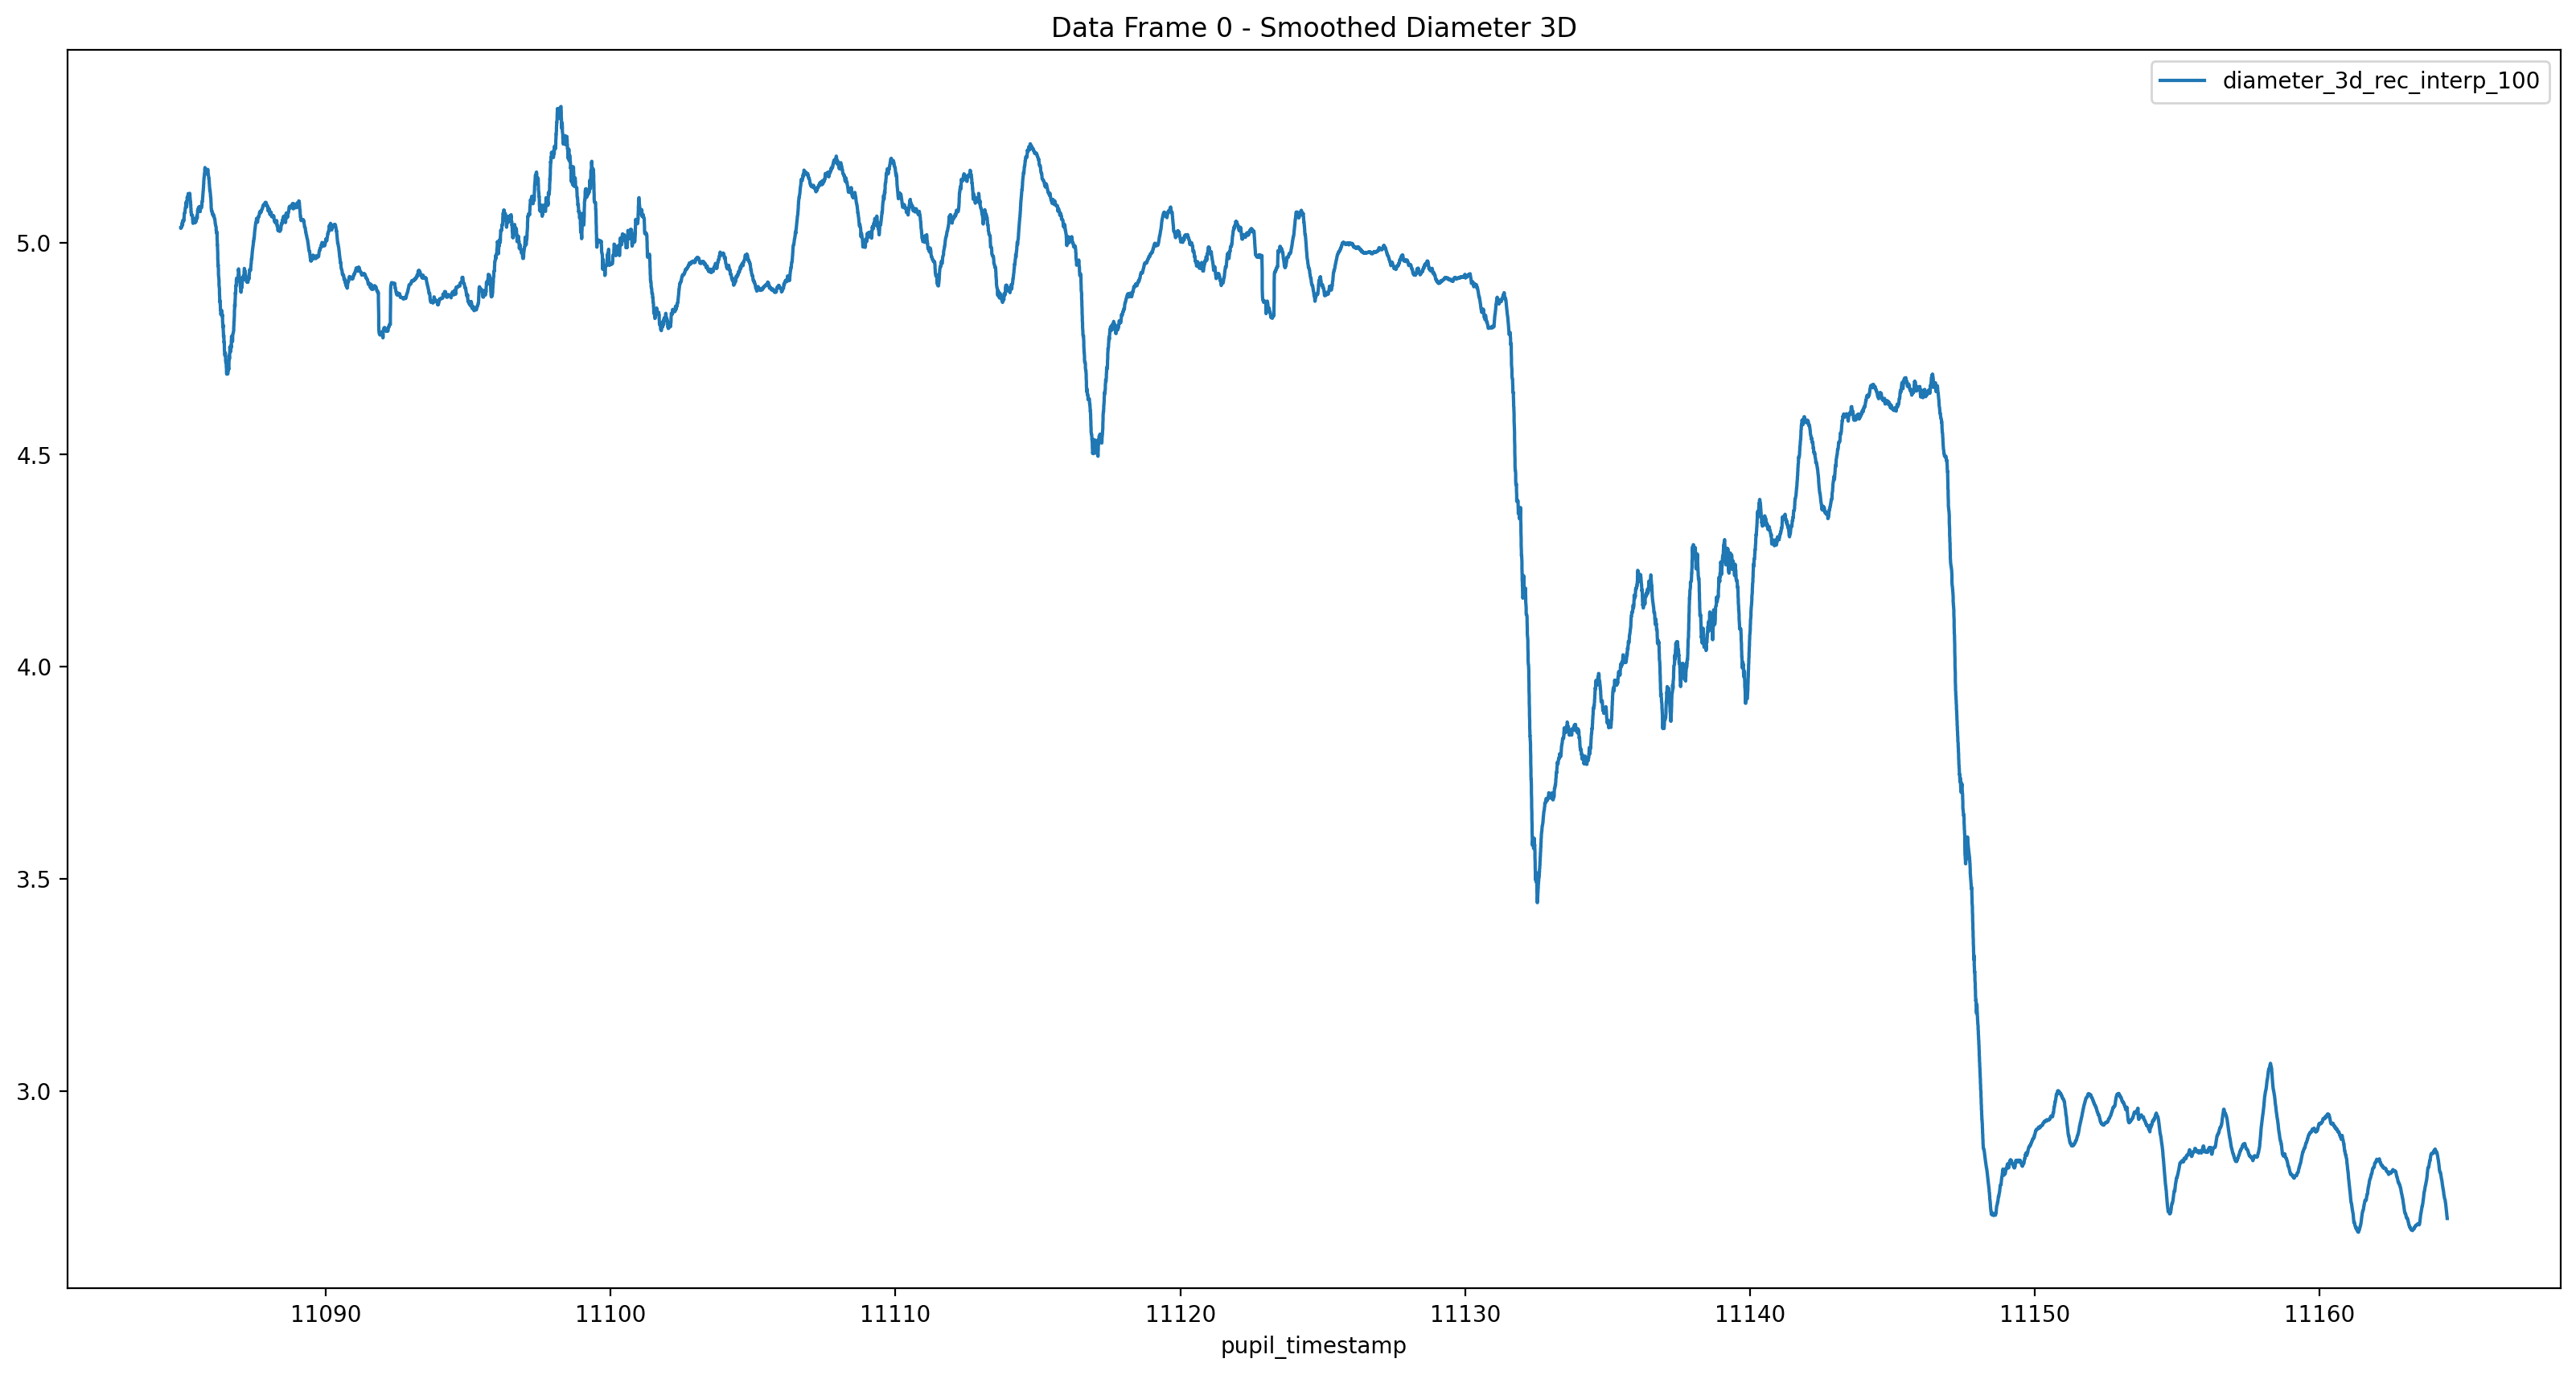

In [8]:
# Iterate over the specified data frames
for i in plot_range:
    what = eye0[i]
    reconstruct(what)
    
    def reconstruct3d(eye, window_size=100):
        # Remove blinks.
        eye['diameter_3d_interp']=eye['diameter_3d'].interpolate(method='linear')
        eye['diameter_3d_rec']=checkdataPLR.blinkreconstruct(eye['diameter_3d_interp'],
                                                          mode='advanced')
        # blinkreconstruct replaces the bliks with NaN with mode='advanced',
        # so we interpolate the gaps and low pass the result to obtain something. 
        eye['diameter_3d_rec_interp']=eye['diameter_3d_rec'].interpolate(method='linear')
        # Use moving average + recenter as low pass.
        eye['diameter_3d_rec_interp_100']=eye['diameter_3d_rec_interp'].rolling(window=window_size).mean().shift(-window_size//2)

        
plot_range = range(1)  # Indices of data frames to plot (0-19)

    # Iterate over the specified data frames
for i in plot_range:
    what = eye0[i]
    reconstruct3d(what)
    
    sub = what.plot(x='pupil_timestamp', y='diameter_3d', kind='line')

    sub = what.plot(ax=sub, x='pupil_timestamp', y='diameter_3d_rec_interp', kind='line')
    sub.set_title(f"Data Frame {i} - Original and Reconstructed Diameter 3D")

    sub = what.plot(x='pupil_timestamp', y='diameter_3d_rec_interp', kind='line')

    sub = what.plot(ax=sub, x='pupil_timestamp', y='diameter_3d_rec_interp_100', kind='line')
    sub.set_title(f"Data Frame {i} - Reconstructed and Smoothed Diameter 3D")

    what.plot(x='pupil_timestamp', y='diameter_3d_rec_interp_100', kind='line')
    plt.title(f"Data Frame {i} - Smoothed Diameter 3D")

    plt.show()


# How does it look like?
#eye=eye0[1]
#reconstruct3d(eye)

#eye.plot(x='pupil_timestamp', y='diameter_3d', kind='line')

#sub=eye.plot(x='pupil_timestamp', y='diameter_3d', kind='line')
#sub=eye.plot(ax=sub,x='pupil_timestamp', y='diameter_rec', kind='line')
#eye.plot(ax=sub,x='pupil_timestamp', y='diameter_3d_rec_interp', kind='line')

#sub=eye.plot(x='pupil_timestamp', y='diameter_3d_rec_interp', kind='line')
#eye.plot(ax=sub,x='pupil_timestamp', y='diameter_3d_rec_interp_100', kind='line')
# Make an extra plot to see how the smoothed data looks like
#eye.plot(x='pupil_timestamp', y='diameter_3d_rec_interp_100', kind='line')

